* 제각각 계산시 결측치 있는 샘플은 버림

- 내진설계 된 육교 퍼센트
- 안전등급별 육교 개수, 비율
- 육교가 만들어진 연도 vs 장애인편의시설 간 상관관계
    연도, 장애인편의시설 갖춘 육교의 개수/ 해당연도 건설 육교 개수
    
- 육교연장, 허용통행하중, 통행제한 높이에 대해
    최대, 최소값, 평균, 표준편차
    
        - 길이가 가장 긴 육교(육교연장)
        - 가장 튼튼한 육교(허용통행하중)
        - 가장 높은 육교(통행제한 높이)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def my_split(s):
    block_start = False
    start_index = 0
    ret_list=[]
    for i, c in enumerate(s):
        if block_start==False:
            if c==',':
                ret_list.append(s[start_index:i])
                start_index=i+1
            elif c=='"':
                block_start=True
                start_index = i
        else:
            if c=='"':
                block_start=False
    if s[-1]!=',':
        ret_list.append(s[start_index:])
    return ret_list

def split_len(data_list):
    len_list=[]
    for e in data_list:
        len_list.append(len(e))
    print(set(len_list))
    if len(set(len_list))>1:
        for i in set(len_list):
            print(i, len_list.count(i))
    return set(len_list)

### 코드 읽고 my,split,split_len메소드 호출 및  ndarray로 변환  

In [9]:
csv_data = []
with open('전국육교정보표준데이터.csv') as f:
    for line in f:
        csv_data.append(my_split(line[:-1]))
        
# print(csv_data[:3])
# split_len(csv_data)

for e in enumerate(csv_data[0]):
    print(e)
    
np_data = np.array(csv_data)

(0, '육교명')
(1, '도로종류')
(2, '도로노선번호')
(3, '도로노선명')
(4, '소재지도로명주소')
(5, '위도')
(6, '경도')
(7, '육교연장')
(8, '육교높이')
(9, '허용통행하중')
(10, '통행제한높이')
(11, '육교폭')
(12, '난간높이')
(13, '조명개수')
(14, '장애인편의시설설치여부')
(15, '장애인편의시설종류')
(16, '장애인편의시설수량')
(17, '부대시설종류')
(18, '부대시설수량')
(19, '육교준공일자')
(20, '내진설계적용여부')
(21, '안전등급')
(22, '사용제한구분')
(23, '육교보수보강내역')
(24, '최종안전점검유형')
(25, '최종안전점검일자')
(26, '관리기관명')
(27, '데이터기준일자')
(28, '제공기관코드')
(29, '제공기관명')


### 내진설계 (np.unique, filter)

In [24]:
# 내진설계
sub_data = np_data[1:, 20] #전체 npdata에서 내진설계만 가지고오려고함.
# print(sub_data)
# print(np.unique(sub_data)) # unique사용

val, cnt = np.unique(sub_data, return_counts=True) #value / count로 나옴.
print(val, cnt)
print((cnt[1:]*100)/np.sum(cnt[1:]))

#필터 list 만듬.
filter1 = sub_data!=' '     #bool list filter...
sub_data_f = sub_data[filter1]

#필터 사용하여 빈값 무시.
val, cnt = np.unique(sub_data_f, return_counts = True) #
print(val, cnt)

[' ' 'N' 'Y'] [357 695 166]
[80.72009292 19.27990708]
['N' 'Y'] [695 166]


### 안전등급별 육교 개수 (디멘션 늘림)

In [46]:
#안전등급별 육교 개수
sub_data = np_data[1:, 21]

val, cnt = np.unique(sub_data, return_counts = True)
print(val, cnt)

cnt_percent = (cnt*100)/np.sum(cnt)
print(cnt_percent)

#디멘션 늘림
val2 = np.expand_dims(val, 1)
print(val.shape, val2.shape)
#디멘션 늘림
cnt2 = cnt[:, np.newaxis]
print(cnt.shape, cnt2.shape)

cnt_percent = cnt_percent[:, np.newaxis]



jdata = np.concatenate((val2, cnt2), axis = 1)
print(jdata)

jdata2 = np.concatenate((val2, cnt_percent), axis=1)
print(jdata2)

['미흡' '보통' '불량' '양호' '우수'] [ 25 390   1 795   7]
[ 2.05254516 32.01970443  0.08210181 65.27093596  0.57471264]
(5,) (5, 1)
(5,) (5, 1)
[['미흡' '25']
 ['보통' '390']
 ['불량' '1']
 ['양호' '795']
 ['우수' '7']]
[['미흡' '2.052545155993432']
 ['보통' '32.01970443349754']
 ['불량' '0.08210180623973727']
 ['양호' '65.27093596059113']
 ['우수' '0.5747126436781609']]


### 필터적용하여 값 뽑아냄

In [55]:
filter2 = np_data[:, 21]=='불량'

np_data_f2 = np_data[filter2]
print(np_data_f)

print()

filter3 = np_data[:, 21]=='우수'

np_data_f3 = np_data[filter3]
print(np_data_f3)

[['갈평 보도육교' '기타' '경부선' '경부선' '경기도 평택시 서정동 432-3' '37.05929603'
  '127.0533613' '50' '' '' '8.5' '2.3' '' '' 'N' '없음' '' '없음' '' '' 'N'
  '불량' '사용제한' '' '정밀점검' '2020-12-30' '경기도 평택시' '2022-06-13' '3910000'
  '경기도 평택시']]

[['명륜역 육교' '시도' '0' '중앙대로' '부산광역시 동래구 중앙대로 1414' '35.212111' '129.078911'
  '112' '4.5' '' '4.5' '3' '1.2' '' 'N' '없음' '' '' '' '2009-02-12' ' '
  '우수' '제한없음' '' '정기점검' '2022-09-29' '동래구청' '2022-11-14' '3300000'
  '부산광역시 동래구']
 ['금암공원 인도교' '지방도' '730' '쑥고개로' '전라북도 남원시 쑥고개로 41' '35.3978410614'
  '127.3800269564' '46' '8.5' '3.5' '4.8' '3.5' '1.5' '186' 'Y' '점자블록'
  '1' '엘리베이터+캐노피' '2' '2022-05-17' 'N' '우수' '제한없음' '없음' '정기점검'
  '2022-11-25' '전라북도 남원시청' '2022-11-29' '4700000' '전라북도 남원시']
 ['덕풍북로 보도육교' '시도' '188' '덕풍북로' '경기도 하남시 덕풍북로 100' '37.5543847'
  '127.2013921' '82.2' '' '' '4.5' '' '' '' 'Y' '엘리베이터+경사로' '' '' '' ''
  'Y' '우수' '제한없음' '' '정기점검' '2022-10-13' '경기도 하남시청' '2022-12-19'
  '4040000' '경기도 하남시']
 ['덕풍동로 보도육교' '기타' '도시계획도로' '덕풍동로' '경기도 하남시 덕풍동로 110' '37.5511015'

### 육교연장, 허용통행하중, 통행제한높이 : 최소, 최대, 평균, 표준편차 
* for문 사용함
* 필터를 여러개 만들어 걸러냄
* max, min, mean, std 메소드 사용

- iqr, outliers (이상치) -> 중앙값 quantile50기준 : q25-1.5*iqr / q75+1.5*iqr<br>
　　　　　　　　　　　　 　　　　　　　　　-- iqr : q75 - q25

*** 육교연장
[ 23.   83.   40.  ...  32.4  53.5 121.5]
중앙값:  39.6
quantile: [30.  39.6 56. ]
iqr:  26.0
upper:  95.0
lower:  -9.0


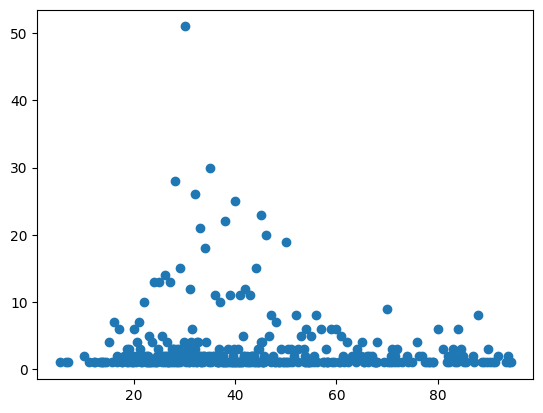

In [175]:
sub_data = np_data[:, 7:11]

# for i in range(7, 11):
i = 7
print('***', np_data[0, i])
sub_data = np_data[1:, i]
# np.unique(sub_data, return_counts=True)
filter1 = (sub_data != '') & (sub_data != '0') & (sub_data != '0.0');   # 결측치
sub_data_f = sub_data[filter1].astype(np.float64)
#print(sub_data_f)
# print('최대: ', np.max(sub_data_f))
# print('최소: ', np.min(sub_data_f))
# print('평균: ', np.mean(sub_data_f))
# print('표준편차: ', np.std(sub_data_f))
print(sub_data_f)
print('중앙값: ', np.median(sub_data_f))   #절반값
print('quantile:', np.quantile(sub_data_f, [.25, .5, .75])) # 숫자의 개수에 가장 중간에 있는 수...(수치가 아님.. 개수임..)

q25, q50,q75 = np.quantile(sub_data_f, [.25, .5, .75])
iqr = q75 - q25
print('iqr: ', iqr)
print('upper: ', q75+1.5*iqr)    #95.0
print('lower: ', q25-1.5*iqr)    #-9.0

sub_data_cut = sub_data_f[sub_data_f < 95.0]

# val, cnt = np.unique(sub_data_f, return_counts = True)
val, cnt = np.unique(sub_data_cut, return_counts = True)

_, axe = plt.subplots()
axe.scatter(val, cnt)

[  3   9  30  64 100 189 124 103 118  57  62  35  31  23  31  12  17  23
  18  11] [ 5.3   9.76 14.22 18.68 23.14 27.6  32.06 36.52 40.98 45.44 49.9  54.36
 58.82 63.28 67.74 72.2  76.66 81.12 85.58 90.04 94.5 ]


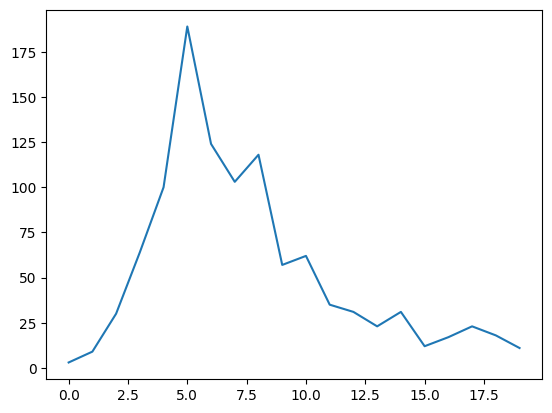

In [184]:
upper = q75+1.5*iqr   #95.0
lower = q25-1.5*iqr    #-9.0

sub_data_cut = sub_data_f[sub_data_f < upper]

h_cnt, h_bins = np.histogram(sub_data_cut, bins=20) #histogram 함수를써서 10칸으로 나누겠다?? (bins=10)
print(h_cnt, h_bins)

# val, cnt = np.unique(sub_data_f, return_counts = True)
val, cnt = np.unique(sub_data_cut, return_counts = True)

_, axe = plt.subplots()
# axe.scatter(val, cnt)
axe.plot(np.arange(20), h_cnt)

### 준공연도별 장애인 편의시설 여부, 상관관계 index14여부,19준공

In [115]:
sub_data = np_data[1:, [14,19]]

# print(sub_data)
# print(np.unique(sub_data, return_counts=True))

filter = sub_data[:, 1] != ''
sub_data= sub_data[filter]

year_yn = []
for yn, ymd in sub_data:
    yr = ymd.split('-')[0]
    year_yn.append(yr + '-' + yn)

# print(year_yn)

year_yn = np.array(year_yn)
val, cnt = np.unique(year_yn, return_counts=True)
print(val, cnt)

['1968-N' '1970-N' '1970-Y' '1971-N' '1972-N' '1974-Y' '1976-N' '1977-N'
 '1977-Y' '1978-Y' '1980-N' '1980-Y' '1982-N' '1983-N' '1984-N' '1986-Y'
 '1987-N' '1987-Y' '1988-N' '1988-Y' '1989-N' '1989-Y' '1990-N' '1991-N'
 '1991-Y' '1992-N' '1992-Y' '1993-N' '1993-Y' '1994-N' '1994-Y' '1995-N'
 '1995-Y' '1996-N' '1996-Y' '1997-N' '1997-Y' '1998-N' '1998-Y' '1999-N'
 '1999-Y' '2000-N' '2000-Y' '2001-N' '2001-Y' '2002-N' '2002-Y' '2003-N'
 '2003-Y' '2004-N' '2004-Y' '2005-N' '2005-Y' '2006-N' '2006-Y' '2007-N'
 '2007-Y' '2008-N' '2008-Y' '2009-N' '2009-Y' '2010-N' '2010-Y' '2011-N'
 '2011-Y' '2012-N' '2012-Y' '2013-Y' '2014-N' '2014-Y' '2015-N' '2015-Y'
 '2016-N' '2016-Y' '2017-Y' '2018-N' '2018-Y' '2019-Y' '2020-N' '2020-Y'
 '2021-Y' '2022-Y'] [ 1  1  1  2  1  1  1  2  1  1  3  1  2  1  3  8  3  2  4  3  3  4  4  8
  2 28 19 26 21 16 11 16  7 33 17 29 24 29 15 14  9  8 10 13 13  8 14 11
 17  9 17  6 21  7 26  6 18  8 28 16 29 10 18  6 16  8 23  9  6  7  2  9
  4 15  4  3  7  3  1  5  1  3]

### pass1
{
    year: [y, n,...]
}
### pass2
[
    [year, y_count, ratio]
]

In [187]:
sub_data = np_data[1:, [14, 19]]
filter1 = sub_data[:, 1] != ''
sub_data = sub_data[filter1]

pass1 = dict()
for yn, ymd in sub_data:
    yr = ymd.split('-')[0]
    if yr in pass1.keys():
        pass1[yr].append(yn)
    else:
        pass1[yr] = [yn]
        
# print(pass1)

pass2 = []
for yr in pass1:
    val, cnt = np.unique(pass1[yr], return_counts=True)
    y, ratio = 0, 0
    if 'Y' in val:
        y = cnt[val=='Y']
    ratio = y/np.sum(cnt)
    pass2.append((int(yr), int(y), float(ratio)))

# sorted(pass2, reverse = True)
np.set_printoptions(precision=3, suppress=True)

pass3 = sorted(pass2, key=lambda x: x[0], reverse = True)
pass3 = np.array(pass3)
print(pass3)

[[2022.       3.       1.   ]
 [2021.       1.       1.   ]
 [2020.       5.       0.833]
 [2019.       3.       1.   ]
 [2018.       7.       0.7  ]
 [2017.       4.       1.   ]
 [2016.      15.       0.789]
 [2015.       9.       0.818]
 [2014.       7.       0.538]
 [2013.       9.       1.   ]
 [2012.      23.       0.742]
 [2011.      16.       0.727]
 [2010.      18.       0.643]
 [2009.      29.       0.644]
 [2008.      28.       0.778]
 [2007.      18.       0.75 ]
 [2006.      26.       0.788]
 [2005.      21.       0.778]
 [2004.      17.       0.654]
 [2003.      17.       0.607]
 [2002.      14.       0.636]
 [2001.      13.       0.5  ]
 [2000.      10.       0.556]
 [1999.       9.       0.391]
 [1998.      15.       0.341]
 [1997.      24.       0.453]
 [1996.      17.       0.34 ]
 [1995.       7.       0.304]
 [1994.      11.       0.407]
 [1993.      21.       0.447]
 [1992.      19.       0.404]
 [1991.       2.       0.2  ]
 [1990.       0.       0.   ]
 [1989.   

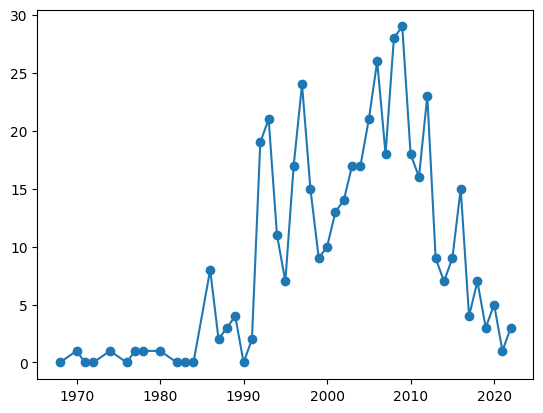

In [156]:
_, axe = plt.subplots()
axe.scatter(pass3[:,0], pass3[:, 1])
axe.plot(pass3[:,0], pass3[:, 1])

In [155]:
# print(pass3)

filter1 = pass3[:, 0] >= 1990
pass4 = pass3[filter1]

print(np.corrcoef(pass4[:, 0], pass4[:, 2]))

[[1.    0.885]
 [0.885 1.   ]]


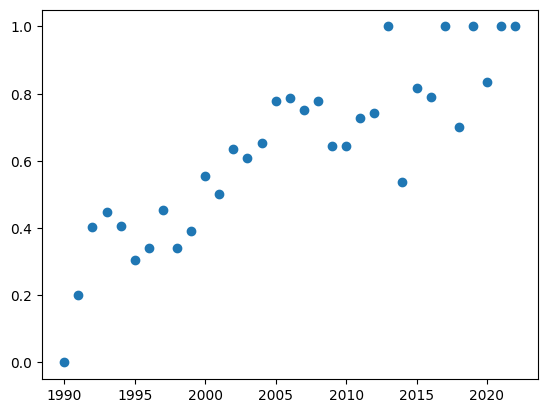

In [185]:
_, axe = plt.subplots()
axe.scatter(pass4[:, 0], pass4[:, 2])